# RNN Para correos de spam

Las Redes Neuronales Recurrentes (RNN) son una clase de redes neuronales especializadas en el procesamiento de secuencias de datos, como series temporales o secuencias de texto, lo que las hace particularmente adecuadas para tareas de procesamiento del lenguaje natural, como es el caso del filtrado de correos electrónicos spam.

En nuestro contexto, las RNN se utilizan para analizar y clasificar correos electrónicos basándose en su contenido textual, identificando aquellos que son spam. A diferencia de las redes neuronales tradicionales, que procesan las entradas de manera independiente, las RNN tienen la capacidad de mantener un estado o memoria de las entradas anteriores, permitiéndoles procesar información de toda la secuencia de texto de un correo electrónico.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import shap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Flatten, Dropout

# Visualización de Resultados
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('data/combined_data.csv')

data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [19]:
X = data['text'].astype(str)  
y = data['label']

In [20]:
# Configura el Tokenizer y convierte los textos a secuencias
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [21]:
# Aplica padding a las secuencias
X_padded = pad_sequences(sequences, maxlen=5000)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.25, random_state=42)

In [22]:
train_sequences = X_train 
size = len(tokenizer.word_index) + 1
seq_len = max([len(seq) for seq in train_sequences])

In [23]:
model = Sequential()
model.add(Embedding(input_dim=size, output_dim=50, input_length=seq_len))
model.add(SimpleRNN(64))  # Utilizando SimpleRNN en lugar de LSTM
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/Caskroom/miniforge/base/envs/ML/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1382s 4s/step - accuracy: 0.8718 - loss: 0.2921 - val_accuracy: 0.9622 - val_loss: 0.1162
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1280s 3s/step - accuracy: 0.9842 - loss: 0.0526 - val_accuracy: 0.9806 - val_loss: 0.0638
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1676s 4s/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0.9827 - val_loss: 0.0644
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1629s 4s/step - accuracy: 0.9647 - loss: 0.0993 - val_accuracy: 0.8105 - val_loss: 0.3949
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1355s 3s/step - accuracy: 0.8205 - loss: 0.3849 - val_accuracy: 0.8919 - val_loss: 0.2515
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1353s 3s/step - accuracy: 0.8919 - loss: 0.2600 - val_accuracy: 0.9104 - val_loss: 0.2177
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1286s 3s/step - accuracy: 0.9368 - loss: 0.1632 - val_accuracy: 0.9302 - val_loss: 0.1823
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1287s 3s/step - accuracy: 0.9560 - loss: 0.1213 - 

In [28]:
# Evaluación del modelo
results = model.evaluate(X_val, y_val)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

652/652 ━━━━━━━━━━━━━━━━━━━━ 166s 254ms/step - accuracy: 0.9566 - loss: 0.1409
Test Loss: 0.14106789231300354, Test Accuracy: 0.957290768623352


Los resultados obtenidos del modelo son muy buenos con un Test Accuracy de 0.9572 y un Test Loss de 0.14106. Seguidamente se muestra un gráfico con todas las epochs entrenadas.

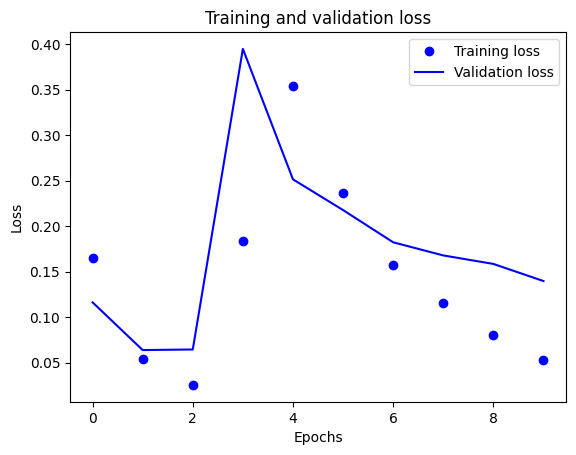

In [29]:
# Gráfico de la pérdida
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

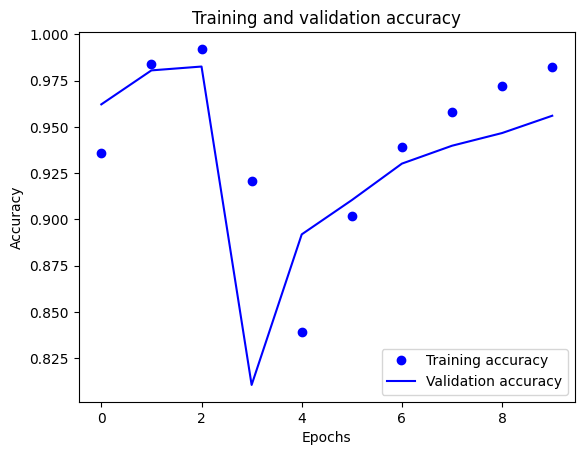

In [33]:
# Gráfico de la precisión
plt.plot(history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Variables importantes

Debido a la gran cantidad de datos calcular las variables importantes del X_val (20,862 registros) el calculo de tiempo estimado en entrenarse es de aproximadamente 1490 horas. Por ello, se intentó seleccionar un conjunto menor de horas. Esto tampoco funcionó ya que el tiempo de ejecución era demasiado largo.

In [34]:
# Determina el tamaño del subconjunto como un porcentaje del total (e.g., 10%)
subset_size = int(0.01 * len(X_val))  # Cambia 0.1 a la fracción deseada

# Genera índices aleatorios
indices = np.random.choice(len(X_val), subset_size, replace=False)

# Selecciona el subconjunto usando los índices
X_val_subset = X_val[indices]

In [ ]:
explainer = shap.Explainer(model.predict, X_val_subset)

shap_values = explainer(X_val_subset, max_evals=5857)

shap.plots.waterfall(shap_values[0])

Una vez analizados los tres modelos se puede observar que RNN es el peor modelo, a pesar de tener unos resultados muy buenos de Test Accuracy: 0.9572 y Test Loss: 0.14106. 